<figure>
<center>
<img src="Imagenes/logo_UTN.png">
</figure>
    
# Teoría de los circuitos II: Trabajo Práctico de Laboratorio N°1
### Curso: R4001
### Alumno: Gonzalo Goumaz

## Consigna
Se pide desarrollar un filtro Notch utilizando el circuito integrado UAF42 provisto por la cátedra. El mismo, debe responder a las siguientes características:
<figure>
<center>
<img src="Imagenes/consigna.png">
<figcaption> Fig 1: Especificaciones del filtro solicitado </figcaption>
</figure>
El día del laboratorio deberá realizarse una serie de mediciones con el fin de reconstruir la respuesta de módulo, de fase y el retardo de grupo del filtro desarrollado, por lo que se deberá asistir con el circuito ya armado y funcionando en una placa experimental o pcb y con las correspondientes simulaciones numéricas y/o circuitales. 

## Desarrollo del filtro
En esta sección se trabaja con la hoja de datos del circuito integrado para elegir el valor de los componentes que deben utilizarse junto con el UAF42 para llegar a la función de transferencia de tensiones deseada.
<figure>
<center>
<img src="Imagenes/schematic_uaf42.png">
<figcaption> Fig 2: Diagrama circuital del UAF42 </figcaption>
</figure>

In [1]:
from IPython.display import IFrame
IFrame("./Desarrollo_Matematico.pdf", width = 900, height = 900)

### Fé de erratas
Durante el desarrollo del filtro, en una primera instancia los valores de Rf1 y Rf2 eran iguales. La resistencia RQ calculada para esta condición resultaba ser de 6250$\Omega$, siendo el valor comercial más cercano de 6k2$\Omega$ al 1%. La propuesta de reemplazar las Rf por una estructura en T surgió más tarde durante el desarrollo y no se corrigió el valor de RQ al nuevo valor de 6k8$\Omega$ lo cual tiene por consecuencia que el valor de Q sea
\begin{equation}
    Q = \left(1 + \frac{R_G}{2R_Q}\right)\sqrt{\frac{Rf_1}{Rf_2}} = 5,339
\end{equation}
En lugar de 5 como lo establece la consigna. Es por esto que el ancho de banda será apenas más chico, siendo de 9,36Hz en lugar de 10Hz.


## Diagrama de bloques del filtro
Con el desarrollo propuesto, el filtro queda representado por el siguiente diagrama de bloques
<figure>
<center>
<img src="Imagenes/diagrama_bloques.png">
<figcaption> Fig 3: Diagrama de bloques del filtro desarrollado </figcaption>
</figure>
Donde a es la constante que acompaña a las transferencias de los filtros pasa bajos y pasa altos.

## Simulación en Python
En esta sección se analiza la respuesta de módulo y fase, y el diagrama de polos y ceros de la función de transferencia que caracteriza al filtro.

Transferencia del filtro notch normalizado


<IPython.core.display.Math object>

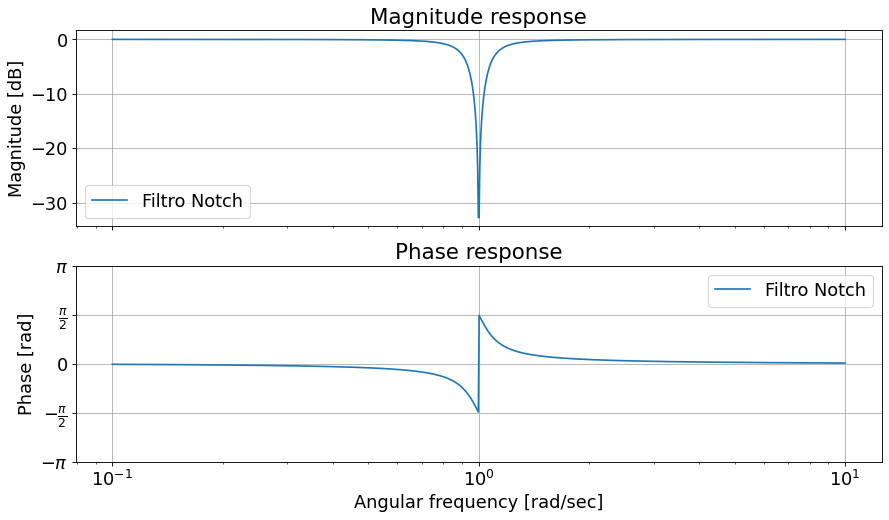

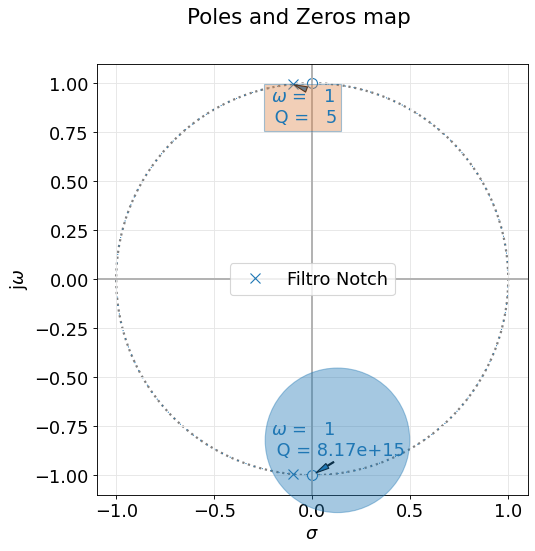

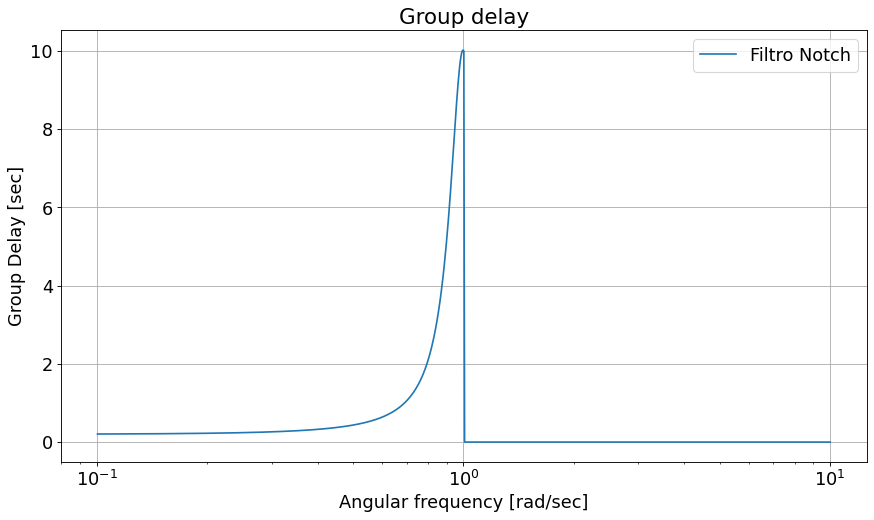

In [2]:
import scipy.signal as sig
import matplotlib.pyplot as plt
import pytc2.sistemas_lineales as tc2
import math as m

# Para fijar el estilo de gráficos en el notebook
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80
fig_font_size = 16

plt.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
plt.rcParams['figure.dpi'] = (fig_dpi)
plt.rcParams.update({'font.size':fig_font_size})

# Requisitos de plantilla
f0 = 50         # [Hz]
BW = 10         # [Hz]              
n  = 2          # [Hz]

w0 = 2*m.pi*f0
Q = f0/BW

# Armo la funcion transferencia normalizada
den = [1, 1/Q, 1]
num = [1, 0, 1]

tf_notch = sig.TransferFunction(num, den)

print("Transferencia del filtro notch normalizado")
tc2.pretty_print_lti(num, den)

# Analizo la transferencia
tc2.analyze_sys(tf_notch, sys_name='Filtro Notch')


Si se analiza el gráfico correspondiente a la respuesta de módulo puede verse que el filtro elimina la frecuencia 1, que desnormalizada se corresponde con 50Hz.
Si se pone el cursor en las posición correspondiente a la frecuencia de corte inferior, siendo esta de 45,25Hz (0.905 normalizado), puede verse que la respuesta cae 3dB, tal como era de esperarse.
<figure>
<center>
<img src="Simulacion Python/fc_inferior.png">
<figcaption> Fig 4.1: Frecuencia de corte inferior </figcaption>
</figure>

Lo mismo sucede si se analiza la frecuencia de corte superior, siendo esta de 55,25Hz (1,105 normalizado)
<figure>
<center>
<img src="Simulacion Python/fc_superior.png">
<figcaption> Fig 4.2: Frecuencia de corte superior </figcaption>
</figure>

## Implementación y simulación en LTspice
Para las simulaciones en LTspice se utilizará una $R_Q = 6k2\Omega$ con el fin de poder comparar los resultados de la simulación con los resultados de las mediciones efectuadas en el laboratorio. Es por esto que las frecuencias de corte inferior y superior del filtro deberían estar cercanas a los 45,55Hz y 54,89Hz respectivamente.
La red que implementa al filtro notch es la que se muestra en la siguiente figura.
<figure>
<center>
<img src="Simulaciones LTspice/red_spice.png">
<figcaption> Fig 5.1: Red del filtro en LTspice </figcaption>
</figure>

A continuación se adjunta el pinout correspondiente al UAF42, extraído de la hoja de datos, con el fin de facilitar la interpretación de la red circuital.
<figure>
<center>
<img src="Imagenes/pinout_uaf42.png">
<figcaption> Fig 5.2: Pinout UAF42 </figcaption>
</figure>

Puede observarse que los resultados de simulación son los esperados. Tal como fue anticipado, el ancho de banda del filtro es de 9,34Hz debido a la falta de corrección de la resistencia que ajusta al factor de selectividad.
<figure>
<center>
<img src="Simulaciones LTspice/sim_spice.png">
<figcaption> Fig 5.3: Simulación de la red correspondiente a la Figura 5.1 </figcaption>
</figure>

LTspice también permite ver el gráfico del retardo de grupo, el cuál será útil para poder comparar con los resultados de las mediciones posteriores.
<figure>
<center>
<img src="Simulaciones LTspice/group_delay_spice.png">
<figcaption> Fig 5.4: Retardo de grupo simulado en LTspice</figcaption>
</figure>

### Análisis de Montecarlo
Para poder asegurar que con un solo preset, ubicado en la resistencia Rc de la estructura en T propuesta que reemplaza a las Rf, se realiza el siguiente análisis de Montecarlo.
Debe tenerse en cuenta que el preset en serie permite aumentar el valor de Rc, haciendo que la frecuencia f0 disminuya.
<figure>
<center>
<img src="Simulaciones LTspice/red_montecarlo.png">
<figcaption> Fig 6.1: Draft utilizado para el análisis de Montecarlo</figcaption>
</figure>

<figure>
<center>
<img src="Simulaciones LTspice/sim_montecarlo.png">
<figcaption> Fig 6.2: Análisis de Montecarlo</figcaption>
</figure>

Puede verse que para todos los casos la frecuencia eliminada, sin utilizar el ajuste del preset, es mayor a 50Hz, lo cual significa que será posible ajustar la frecuencia f0 a 50Hz para todos los casos. 

## Diseño de la placa
El diseño de la placa se hizo sobre KiCad.
En la siguiente figura puede verse el esquemático del filtro notch desarrollado.
<figure>
<center>
<img src="Imagenes/esquematico.png">
<figcaption> Fig 7: Esquemático</figcaption>
</figure>

Para la prueba de laboratorio se utilizaría una placa experimental, por lo que, teniendo en cuenta esto, se utilizó una grilla de 2,54mm para que se corresponda con el pitch de las placas universales.
<figure>
<center>
<img src="Imagenes/pcb.png">
<figcaption> Fig 8: Placement de componentes sobre una grilla de 2,54mm</figcaption>
</figure>

A continuación puede verse una lista con los componentes utilizados
<figure>
<center>
<img src="Imagenes/bom.png">
<figcaption> Fig 9: BOM</figcaption>
</figure>

## Banco de mediciones 
El siguiente diagrama de bloques representa al banco de mediciones utilizado para llevar a cabo las mediciones el día del laboratorio.
<figure>
<center>
<img src="Imagenes/banco_mediciones.png">
<figcaption> Fig 9: Diagrama de bloques del banco de mediciones</figcaption>
</figure>

A continuación, se muestran algunas de las fotos realizadas durante el día del ensayo.
<figure>
<center>
<img src="Imagenes/placa.png">
<figcaption> Fig 10.1: Placa utilizada</figcaption>
</figure>
<figure>
<center>
<img src="Imagenes/mesa_trabajo.png">
<figcaption> Fig 10.2: Mesa de trabajo, con el banco de mediciones ya conectado</figcaption>
</figure>

## Mediciones: Apartado teórico
Para recordar, el objetivo es poder reconstruir los gráficos de respuesta de módulo, de respuesta de fase y del retardo de grupo. Para esto, se realizarán mediciones en distintos puntos de frecuencia convenientes según el análisis de las simulaciones previas. Dichas mediciones consisten en realizar una lectura de los valores eficaces, de las señales de entrada y salida, medidos por el osciloscopio. Luego, mediante el uso de cursores, se mide el retardo de fase entre la señal que llega a cada uno de los canales.

Para poder obtener el valor del módulo de la función de transferencia en dB, para cada punto, se utiliza la siguiente relación.

\begin{equation}
    \left|H(j\omega)\right|_{dB} = 20\log{\left(\frac{V_{rms,out}}{V_{rms,in}}\right)}
\end{equation}

Luego, para obtener la fase en cada punto, se utiliza la definición de retardo de fase. Siendo esta

\begin{equation}
    \tau_F(\omega) = -\frac{\phi(j\omega)}{\omega}
\end{equation}

Donde tanto el retardo de fase como la frecuencia son datos conocidos. El primero se obtiene a través del uso del osciloscopio, mientras que el segundo es impuesto por el generador de señales.

Una vez definida la fase, es posible calcular el retardo de grupo, el cual está definido según

\begin{equation}
    \tau_G(\omega) = -\frac{\partial\phi(j\omega)}{\partial\omega}
\end{equation}


## Mediciones: Resultados
En la tabla que se muestra a continuación se encuentran cargados los resultados de las mediciones para los distintos puntos en frecuencia. También puede verse los valores arrojados por la simulación en LTspice para las mismas frecuencias de trabajo, con el objetivo de poder comparar los resultados obtenidos en el laboratorio.
<figure>
<center>
<img src="Mediciones/tabla_mediciones.png">
<figcaption> Fig 11: Tabla de resultados de mediciones</figcaption>
</figure>

A partir de esta tabla, es posible reconstruir los gráficos asociados a la respuesta del filtro. Para esto, se utilizó las herramientas que proveé Excel.
Los gráficos resultantes pueden verse a continuación
<figure>
<center>
<img src="Mediciones/modulo_mediciones.png">
<figcaption> Fig 12.1: Respuesta de módulo, a partir de las mediciones efectuadas</figcaption>
</figure>

<figure>
<center>
<img src="Mediciones/fase_mediciones.png">
<figcaption> Fig 12.2: Respuesta de fase, a partir de las mediciones efectuadas</figcaption>
</figure>

<figure>
<center>
<img src="Mediciones/group_delay_mediciones.png">
<figcaption> Fig 12.3: Retardo de grupo, a partir de las mediciones efectuadas</figcaption>
</figure>

Se observa a simple vista que la respuesta de módulo y fase del filtro es la esperada. Las pequeñas diferencias entre los valores pueden atribuirse a la incertidumbre asociada a la medición con el osciloscopio y a la asociada a los propios componentes.
Para el caso del group delay, si bien el gráfico comparte cierta similitud con el simulado en LTspice, es conveniente realizar algún otro análisis para determinar si los resultados obtenidos están dentro de lo esperado.
En primer lugar, al analizar los valores en la tabla, puede verse que el retardo de grupo obtenido a partir de las mediciones difiere de los valores obtenidos en el spice. Sin embargo, si se utiliza el análisis de montecarlo y se analiza el group delay, puede verse que el pico puede llegar a ser del orden de los 200ms.


<figure>
<center>
<img src="Simulaciones LTspice/group_delay_montecarlo.png">
<figcaption> Fig 12.4: Análisis de montecarlo para el retardo de grupo</figcaption>
</figure>

En base a esta observación, se puede afirmar que los resultados de las mediciones son correctos y que se corresponden con el comportamiento esperado para este filtro notch.

Si se desea obtener gráficos más exactos, se deben realizar más mediciones utilizando intervalos de frecuencia más chicos en la zona de interés.

## Prueba en analizador de audio


En esta sección se analizarán los gráficos resultantes de realizar una prueba del filtro en la que se utilizó un Analizador de Audio Agilent U8903A


<figure>
<center>
<img src="Mediciones/modulo1_audio_analyzer.png">
<figcaption> Fig 13.1: Respuesta de módulo generada a partir de 300 puntos </figcaption>
</figure>
    
En este gráfico generado por el instrumental utilizado, se observa que la atenuación máxima del filtro queda por debajo de lo esperado, siendo de aproximadamente 12dB con respecto a los más de 30dB esperados. Esto se debe a que no se analizó el comportamiento del filtro en suficientes puntos.

Al utilizar más puntos de análisis, para el caso de este filtro, el analizador de audio no es capaz de interpolar correctamente los puntos, lo que resulta en un gráfico de respuesta de módulo erróneo.
<figure>
<center>
<img src="Mediciones/modulo2_audio_analyzer.png">
<figcaption> Fig 13.2: Respuesta de módulo generada a partir de 1000 puntos </figcaption>
</figure>

En el gráfico de la respuesta de fase, debido a los puntos de medición, se observa un recorte en la parte negativa, antes de llegar a la frecuencia a la que se ubica el cero de transmisión.
<figure>
<center>
<img src="Mediciones/phase_audio_analyzer.png">
<figcaption> Fig 14: Respuesta de módulo </figcaption>
</figure>

## Conclusiones del trabajo de laboratorio
A la hora de desarrollar un filtro, se transita por distintas etapas de desarrollo matemático, simulaciones, implementación, diseño, pruebas reales, entre otras. En las etapas de simulación se utilizan diversas herramientas que permitirán analizar el comportamiento del filtro y para identificar posibles errores en el diseño. Además, sirve para poder comparar los resultados en una etapa posterior de mediciones reales.
Durante este trabajo, fue posible verificar a través de distintas técnicas de medición que el filtro desarrollado cumple con las características para las cuales fue diseñado.

## Instrumental utilizado

Si se desea replicar las mediciones realizadas para este trabajo, a continuación se encuentra una tabla con los instrumentos utilizados junto a su respectivo código de identificación dentro de la facultad.
<figure>
<center>
<img src="Imagenes/instrumentos.png">
<figcaption> Fig 15: Instrumentos utilizados </figcaption>
</figure>